# NLP - EXPLORE

Do your work for this exercise in a file named explore.

## 1. Spam Data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

from wordcloud import WordCloud
from prepare import basic_clean, lemmatize, remove_stopwords

In [8]:
# set up some basic matplotlib style parameters
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [9]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

### 1a. 
- Load the spam data set.

In [10]:
#acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)))

In [13]:
#df.text = df.text.apply(clean)

In [15]:
'''
all_text = ' '.join(df.text)
spam_text = ' '.join(df[df.label == 'spam'].text)
ham_text = ' '.join(df[df.label == 'ham'].text)
all_text = clean(all_text)
spam_text = clean(spam_text)
ham_text = clean(ham_text)
'''

"\nall_text = ' '.join(df.text)\nspam_text = ' '.join(df[df.label == 'spam'].text)\nham_text = ' '.join(df[df.label == 'ham'].text)\nall_text = clean(all_text)\nspam_text = clean(spam_text)\nham_text = clean(ham_text)\n"

In [16]:
ham_freq = pd.Series(ham_text.split()).value_counts()
spam_freq = pd.Series(spam_text.split()).value_counts()
all_freq = pd.Series(all_text.split()).value_counts()

In [17]:
word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)
word_counts.columns = ['all', 'spam', 'ham']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [18]:
word_counts.sort_values(by='all', ascending=False)

,all,spam,ham
u,779,62,717
2,524,198,326
call,393,189,204
get,335,45,290
ur,312,114,198
...,...,...,...
lowly,1,0,1
lowes,1,0,1
lovly,1,0,1
avoids,1,0,1


In [19]:
word_counts.assign(p_spam=word_counts.spam / word_counts['all'],p_ham=word_counts.ham / word_counts['all'])


,all,spam,ham,p_spam,p_ham
',19,6,13,0.315789,0.684211
'',19,0,19,0.000000,1.000000
'''',5,0,5,0.000000,1.000000
'aangalyam,2,0,2,0.000000,1.000000
'anything',1,0,1,0.000000,1.000000
...,...,...,...,...,...
zeros,1,0,1,0.000000,1.000000
zhong,1,0,1,0.000000,1.000000
zoom,1,0,1,0.000000,1.000000
zyada,1,0,1,0.000000,1.000000


### 1b. 
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [22]:
df['bigram'] = [list(nltk.bigrams(text.split())) for text in df.text]
df.head()

,label,text,bigram
id,,,
0,ham,jurong point crazy vailable bugis n great worl...,"[(jurong, point), (point, crazy), (crazy, vail..."
1,ham,k lar oking wif u oni,"[(k, lar), (lar, oking), (oking, wif), (wif, u..."
2,spam,ree entry 2 wkly comp win final tkts 21st ay 2...,"[(ree, entry), (entry, 2), (2, wkly), (wkly, c..."
3,ham,dun say early hor c already say,"[(dun, say), (say, early), (early, hor), (hor,..."
4,ham,ah think goes usf lives around though,"[(ah, think), (think, goes), (goes, usf), (usf..."


In [24]:
from wordcloud import WordCloud
text_one = df.text[0]
text_one

'jurong point crazy vailable bugis n great world la e buffet ine got amore wat'

(-0.5, 799.5, 599.5, -0.5)

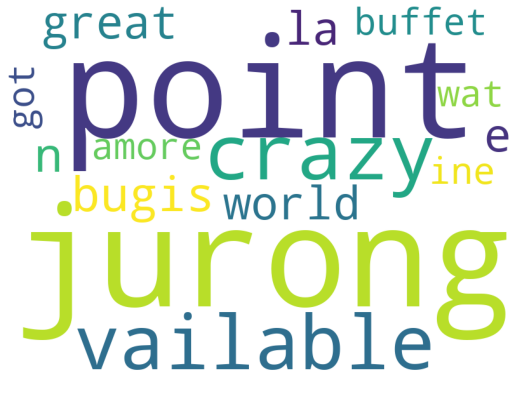

In [25]:
img = WordCloud(background_color='white',width=800, height=600).generate(text_one)
plt.imshow(img)
plt.axis('off')

### 1c. 
- Is there any overlap in the bigrams for the spam data and the ham data?

### 1d. 
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

## 2. 
- Explore the blog articles using the techniques discussed in the exploration lesson.

## 3. 
- Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.